In [14]:
import pandas as pd
import numpy as np
import random
import shap
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from modules import utils, constants
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc

In [15]:
SEED = constants.SEED
random.seed(SEED)
np.random.seed(SEED)

#### The Datasets

In [16]:
train_df = pd.read_csv('../data/train_set_basic.csv')
train_df = train_df.fillna(-1)
X_train = train_df.iloc[:, 0:-1]
y_train = train_df.iloc[:, -1]
X_train.head()

,ana,fever,leukopenia,thrombocytopenia,auto_immune_hemolysis,delirium,psychosis,seizure,non_scarring_alopecia,oral_ulcers,...,joint_involvement,proteinuria,renal_biopsy_class,anti_cardioliphin_antibodies,anti_b2gp4_antibodies,lupus_anti_coagulant,c3,c4,anti_dsdna_antibody,anti_smith_antibody
0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.496625,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.281855,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [17]:
test_df = pd.read_csv('../data/test_set_basic.csv')
X_test = test_df.iloc[:, 0:-1]
y_test = test_df.iloc[:, -1]
X_test.head()

,ana,fever,leukopenia,thrombocytopenia,auto_immune_hemolysis,delirium,psychosis,seizure,non_scarring_alopecia,oral_ulcers,...,joint_involvement,proteinuria,renal_biopsy_class,anti_cardioliphin_antibodies,anti_b2gp4_antibodies,lupus_anti_coagulant,c3,c4,anti_dsdna_antibody,anti_smith_antibody
0,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [18]:
#X_train, y_train = np.array(X_train), np.array(y_train)
#X_test, y_test = np.array(X_test), np.array(y_test)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

#### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=constants.SEED).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
test_df_dt = pd.DataFrame()
test_df_dt['y_actual'] = y_test
test_df_dt['y_pred'] = y_pred_dt
test_df_dt.isna().sum()

y_actual    0
y_pred      0
dtype: int64

In [20]:
acc_dt, prec_dt, recall_dt, f1_dt = utils.test(test_df_dt['y_actual'], test_df_dt['y_pred'])
acc_dt, prec_dt, recall_dt, f1_dt

(99.63499999999999, 94.52054794520548, 89.41684665226782, 91.8978912319645)

##### Feature importance

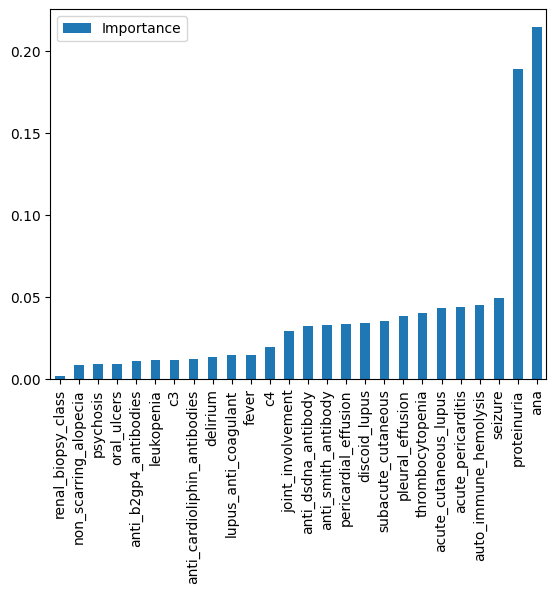

In [21]:
utils.compute_feature_importance(dt, X_train)

##### SHAP

In [22]:
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
len(shap_values)

2

In [23]:
shap_values[0].shape

(20000, 26)

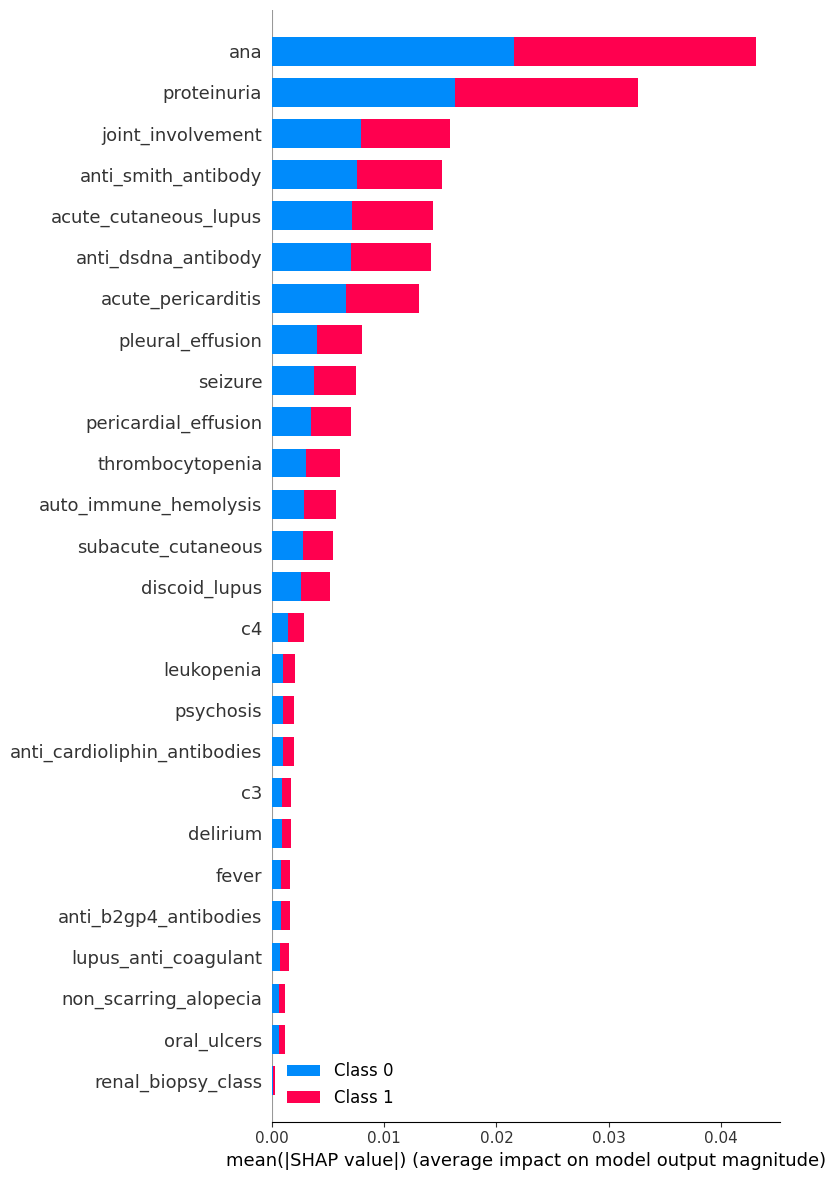

In [26]:
shap.summary_plot(shap_values, X_test, max_display=30)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=constants.SEED).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
test_df_rf = pd.DataFrame()
test_df_rf['y_actual'] = y_test
test_df_rf['y_pred'] = y_pred_rf
test_df_rf.isna().sum()

In [ ]:
acc_rf, prec_rf, recall_rf, f1_rf = utils.test(test_df_rf['y_actual'], test_df_rf['y_pred'])
acc_rf, prec_rf, recall_rf, f1_rf 

#### XGBoost

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=constants.SEED).fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
test_df_xg = pd.DataFrame()
test_df_xg['y_actual'] = y_test
test_df_xg['y_pred'] = y_pred_xg
test_df_xg.isna().sum()

In [ ]:
acc_xg, prec_xg, recall_xg, f1_xg = utils.test(test_df_xg['y_actual'], test_df_xg['y_pred'])
acc_xg, prec_xg, recall_xg, f1_xg